In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
Kb_T=4.1 #pN⋅nm
dt=1.0 #s
k10=(6.01-0.24) #s^-1
k20=(0.007) #s^-1
k12=0.21 #s^-1
k21=0.105 #s^-1
x10=(1.3+0.6)*1e-1 #nm
x20=(1.76)*1e-1 #nm
x12=8.58*1e-1 #nm
x21=-4.2*1e-1 #nm
repeticiones=10000

In [90]:
def rata_de_salida(estado,f):
    if (estado==1.0):
        respuesta=k10*exp(x10*f/(Kb_T))*dt   
    elif (estado==2.0):
        respuesta=k20*exp(x20*f/(Kb_T))*dt  
    return respuesta        

def rata_de_cambio(estado,f):
    if (estado==2.0):
        respuesta=k21*exp(x21*f/(Kb_T))*dt            
    elif (estado==1.0):
        respuesta=k12*exp(x12*f/(Kb_T))*dt   
    return respuesta

def evolucion(f):
    tiempo=[]
    respuesta=zeros((2,repeticiones))
    for k in range (0,repeticiones):
        estado=1.0
        boleano=True 
        t_gillepie=0
        while(boleano):
            ktot=rata_de_cambio(estado,f)+rata_de_salida(estado, f)
            koff=rata_de_salida(estado,f)/ktot
            kon=rata_de_cambio(estado,f)/ktot
            p=random.uniform()  
            if(p<kon):
                if(estado==2.0):
                    estado=1.0
                    t_gillepie=t_gillepie+random.exponential(1.0/ktot)
                elif(estado==1.0):
                    estado=2.0
                    t_gillepie=t_gillepie+random.exponential(1.0/ktot)
        
            else:  
                t_gillepie=t_gillepie+random.exponential(1.0/ktot)
                tiempo.append(t_gillepie)
                boleano=False   
    respuesta[0]=array((sort(tiempo)))*dt
    respuesta[1]=1-linspace(0,1,repeticiones)
    return respuesta

In [91]:
a0=evolucion(0.0)
a1=evolucion(1.0)
a10=evolucion(10.0)
a20=evolucion(20.0)
a30=evolucion(30.0)
a60=evolucion(60.0)
a80=evolucion(80.0)
a100=evolucion(100.0)

In [92]:
a16=evolucion(16.0)
a8=evolucion(8.0)
a4=evolucion(4)
a01=evolucion(0.1)

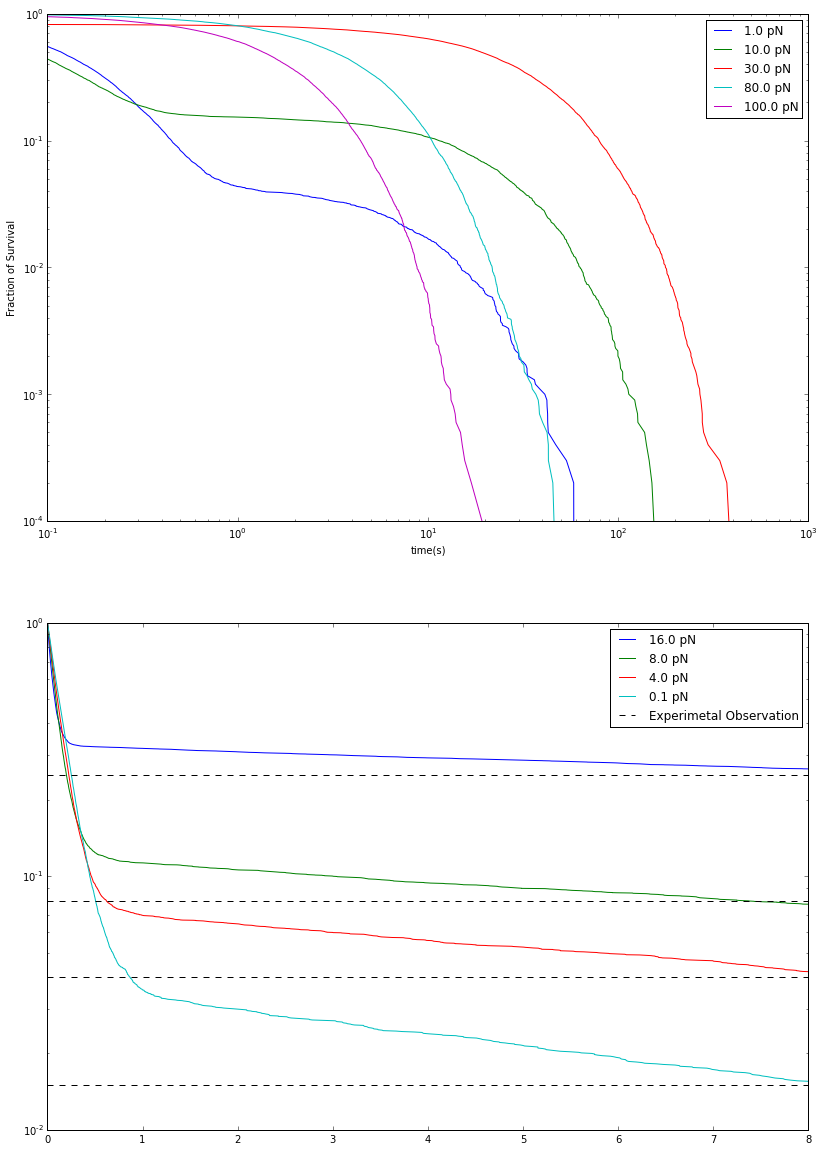

In [93]:
pylab.rcParams['figure.figsize'] = (30, 20)
fig = plt.figure()

plt.subplot(221)
loglog(a1[0],a1[1],label="1.0 pN")
loglog (a10[0],a10[1],label="10.0 pN")
loglog (a30[0],a30[1],label="30.0 pN")
loglog (a80[0],a80[1],label="80.0 pN")
loglog (a100[0],a100[1],label="100.0 pN")
xlim(1e-1)
plt.legend()

ylabel("Fraction of Survival")
xlabel("time(s)")

plt.subplot(223)
semilogy(a16[0],a16[1],label="16.0 pN")
plot(a8[0],a8[1],label="8.0 pN")
plot(a4[0],a4[1],label="4.0 pN")
plot(a01[0],a01[1],label="0.1 pN")
plot(0.25*ones(1000),color="Black",linestyle='--',label="Experimetal Observation")
plot(0.08*ones(1000),color="Black",linestyle='--')
plot(0.04*ones(1000),color="Black",linestyle='--')
plot(0.015*ones(1000),color="Black",linestyle='--')


xlim(0,8)
ylim(1e-2,1)
plt.legend()



savefig('Porcentage_of_survival.png')